In [47]:
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree

In [23]:
#load the data

dataset = pd.read_csv('/workspace/random_forest/data/raw/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
dataset = dataset[dataset['Insulin'] > 0]
dataset = dataset[dataset['Glucose'] > 0]
dataset = dataset[dataset['BMI'] > 0]
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [25]:
X = dataset.drop('Outcome', axis= 1)
y = dataset['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 28)

In [26]:
#Save the data without transforming
X_train_sel = X_train.copy()
X_test_sel = X_test.copy()  

X_train_sel["Outcome"] = y_train.values
X_test_sel["Outcome"] = y_test.values

X_train_sel.to_csv('/workspace/random_forest/data/processed/X_train_sel.csv', index=False)
X_test_sel.to_csv('/workspace/random_forest/data/processed/X_test_sel.csv', index=False)


In [27]:
model = RandomForestClassifier(n_estimators = 100, random_state = 28)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


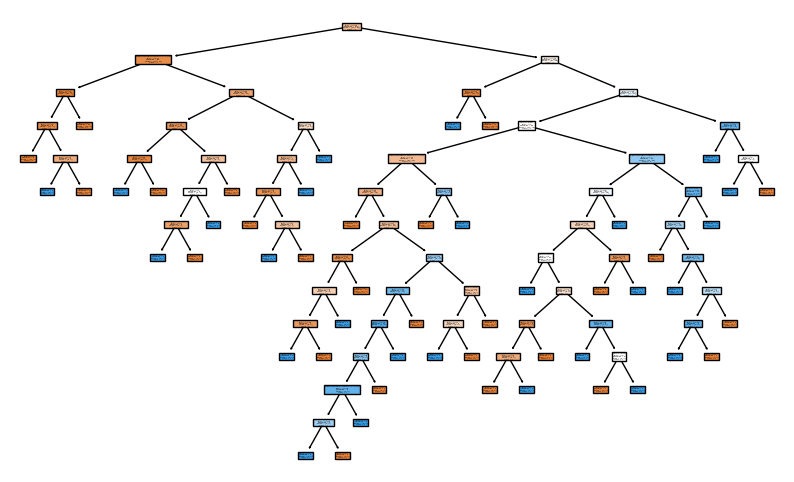

<Figure size 640x480 with 0 Axes>

In [49]:
#showing the radom forest plot

plt.figure(figsize=(10, 6))
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=["0", "1"])
plt.show()
plt.savefig('tree_plot.png')

In [28]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90        55
           1       0.76      0.79      0.78        24

    accuracy                           0.86        79
   macro avg       0.83      0.84      0.84        79
weighted avg       0.86      0.86      0.86        79



Optimizing hyperparameters

In [29]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [43]:
model_grid = RandomForestClassifier(n_estimators = 50, random_state = 28, max_depth = 10, min_samples_leaf= 1, min_samples_split= 10)
model_grid.fit(X_train, y_train)

y_pred1 = model_grid.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
print(f"Optimized model accuracy: {accuracy:.2f}")

print("\nOptimized model Classification report:\n", classification_report(y_test, y_pred1))


Optimized model accuracy: 0.87

Optimized model Classification report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        55
           1       0.79      0.79      0.79        24

    accuracy                           0.87        79
   macro avg       0.85      0.85      0.85        79
weighted avg       0.87      0.87      0.87        79

